# BMMW
---


# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [5]:
data = pd.read_csv("final_train.csv")
data = data.drop(columns = ["Unnamed: 0"])
data.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


# Data understanding

In [6]:
# All activities
activities = set(data.Activity)
print(activities)
print("Number of activities: {}".format(len(activities)))

{'STANDING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'SITTING', 'WALKING'}
Number of activities: 6


In [7]:
# Printing number of features and observations
print("Number of features:", data.shape[1])
print("Number of observations:", data.shape[0])

Number of features: 572
Number of observations: 11086


In [8]:
# Printing number of observations depending on activity
data.groupby('Activity').count().iloc[:,0]

Activity
LAYING                2149
SITTING               2014
STANDING              1971
WALKING               1890
WALKING_DOWNSTAIRS    1380
WALKING_UPSTAIRS      1625
Name: angle(X,gravityMean), dtype: int64

# Filling missing data

In [9]:
print("Number of missing data: " + str(sum(data.isna().sum())))
data.isna().sum()
data = data.fillna(data.median())
print("Number of missing data after filling: " + str(sum(data.isna().sum())))

Number of missing data: 32636
Number of missing data after filling: 0


# Data Visualization

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca = pca.fit_transform(data.drop(columns = ["Activity"]))

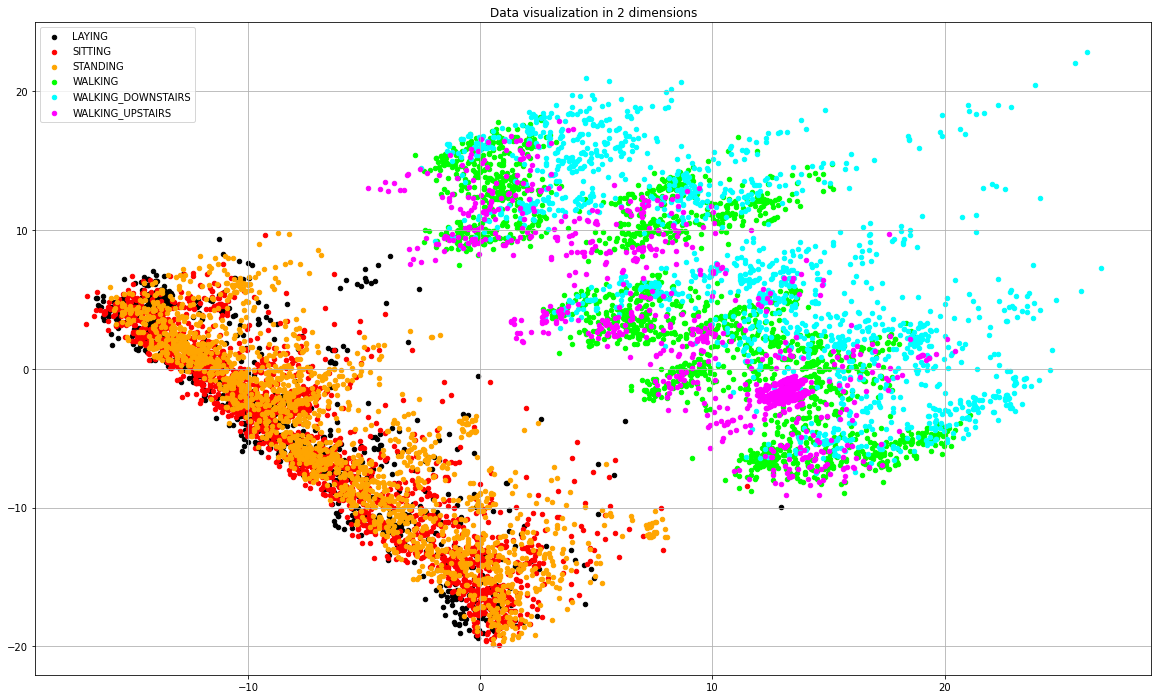

In [8]:
point_size = 20
colors = ['black', 'red', 'orange', 'lime', 'cyan', 'magenta']
labels = ['LAYING',
         'SITTING',
         'STANDING',
         'WALKING',
         'WALKING_DOWNSTAIRS',
         'WALKING_UPSTAIRS']

fig, ax = plt.subplots(figsize=(20, 12))
for color, label in zip(colors, labels):
    ax.scatter(pca[:,0][data.Activity.to_numpy()==label], 
               pca[:,1][data.Activity.to_numpy()==label], 
               s = point_size, 
               color = color, 
               label = label)
    
ax.legend()
ax.set_title("Data visualization in 2 dimensions")
ax.grid(True)
plt.show()

# Data modifications
---

In [10]:
y_data = data.Activity
data = data.drop(columns = ["Activity"])

### Encode activities

In [11]:
encoder = {'LAYING' : 0,
         'SITTING' : 1,
         'STANDING' : 2,
         'WALKING' : 3,
         'WALKING_DOWNSTAIRS' : 4,
         'WALKING_UPSTAIRS' : 5}

decoder = dict([(value, key) for key, value in encoder.items()])

y_data = y_data.replace(encoder)

### Outliers

In [12]:
from scipy import stats

z = np.abs(stats.zscore(data))

print(data.shape)
data = data[(z < 6).all(axis=1)]
y_data = y_data[(z < 6).all(axis=1)]
print(data.shape)

(11086, 571)
(9900, 571)


### Data normalization

In [13]:
from sklearn import preprocessing

x = data.values
columns = data.columns

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

data = pd.DataFrame(x_scaled, columns = columns)

In [14]:
print("Number of missing data: " + str(sum(data.isna().sum())))

Number of missing data: 0


### Reduction of multidimensionality

### Reduction of skewness

In [15]:
for index, value in data.skew().items():
    if value > 4:
        data[index] = (data[index] + 1).apply(np.log)
    elif value < -4:
        data[index] = data[index] * data[index]

# Split data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size = 0.20)

# Features importances

([<matplotlib.axis.XTick at 0x2fa6394b208>,
 [Text(0, 0, 'angle(X,gravityMean)'),
  Text(1, 0, 'angle(Y,gravityMean)'),
  Text(2, 0, 'angle(Z,gravityMean)'),
  Text(3, 0, 'angle(tBodyAccJerkMean),gravityMean)'),
  Text(4, 0, 'angle(tBodyAccMean,gravity)'),
  Text(5, 0, 'angle(tBodyGyroJerkMean,gravityMean)'),
  Text(6, 0, 'angle(tBodyGyroMean,gravityMean)'),
  Text(7, 0, 'energy-mean()'),
  Text(8, 0, 'fBodyAcc-bandsEnergy()-1,16'),
  Text(9, 0, 'fBodyAcc-bandsEnergy()-1,16.1'),
  Text(10, 0, 'fBodyAcc-bandsEnergy()-1,16.2'),
  Text(11, 0, 'fBodyAcc-bandsEnergy()-1,24'),
  Text(12, 0, 'fBodyAcc-bandsEnergy()-1,24.1'),
  Text(13, 0, 'fBodyAcc-bandsEnergy()-1,24.2'),
  Text(14, 0, 'fBodyAcc-bandsEnergy()-1,8'),
  Text(15, 0, 'fBodyAcc-bandsEnergy()-1,8.1'),
  Text(16, 0, 'fBodyAcc-bandsEnergy()-1,8.2'),
  Text(17, 0, 'fBodyAcc-bandsEnergy()-17,24'),
  Text(18, 0, 'fBodyAcc-bandsEnergy()-17,24.1'),
  Text(19, 0, 'fBodyAcc-bandsEnergy()-17,24.2'),
  Text(20, 0, 'fBodyAcc-bandsEnergy()-17,3

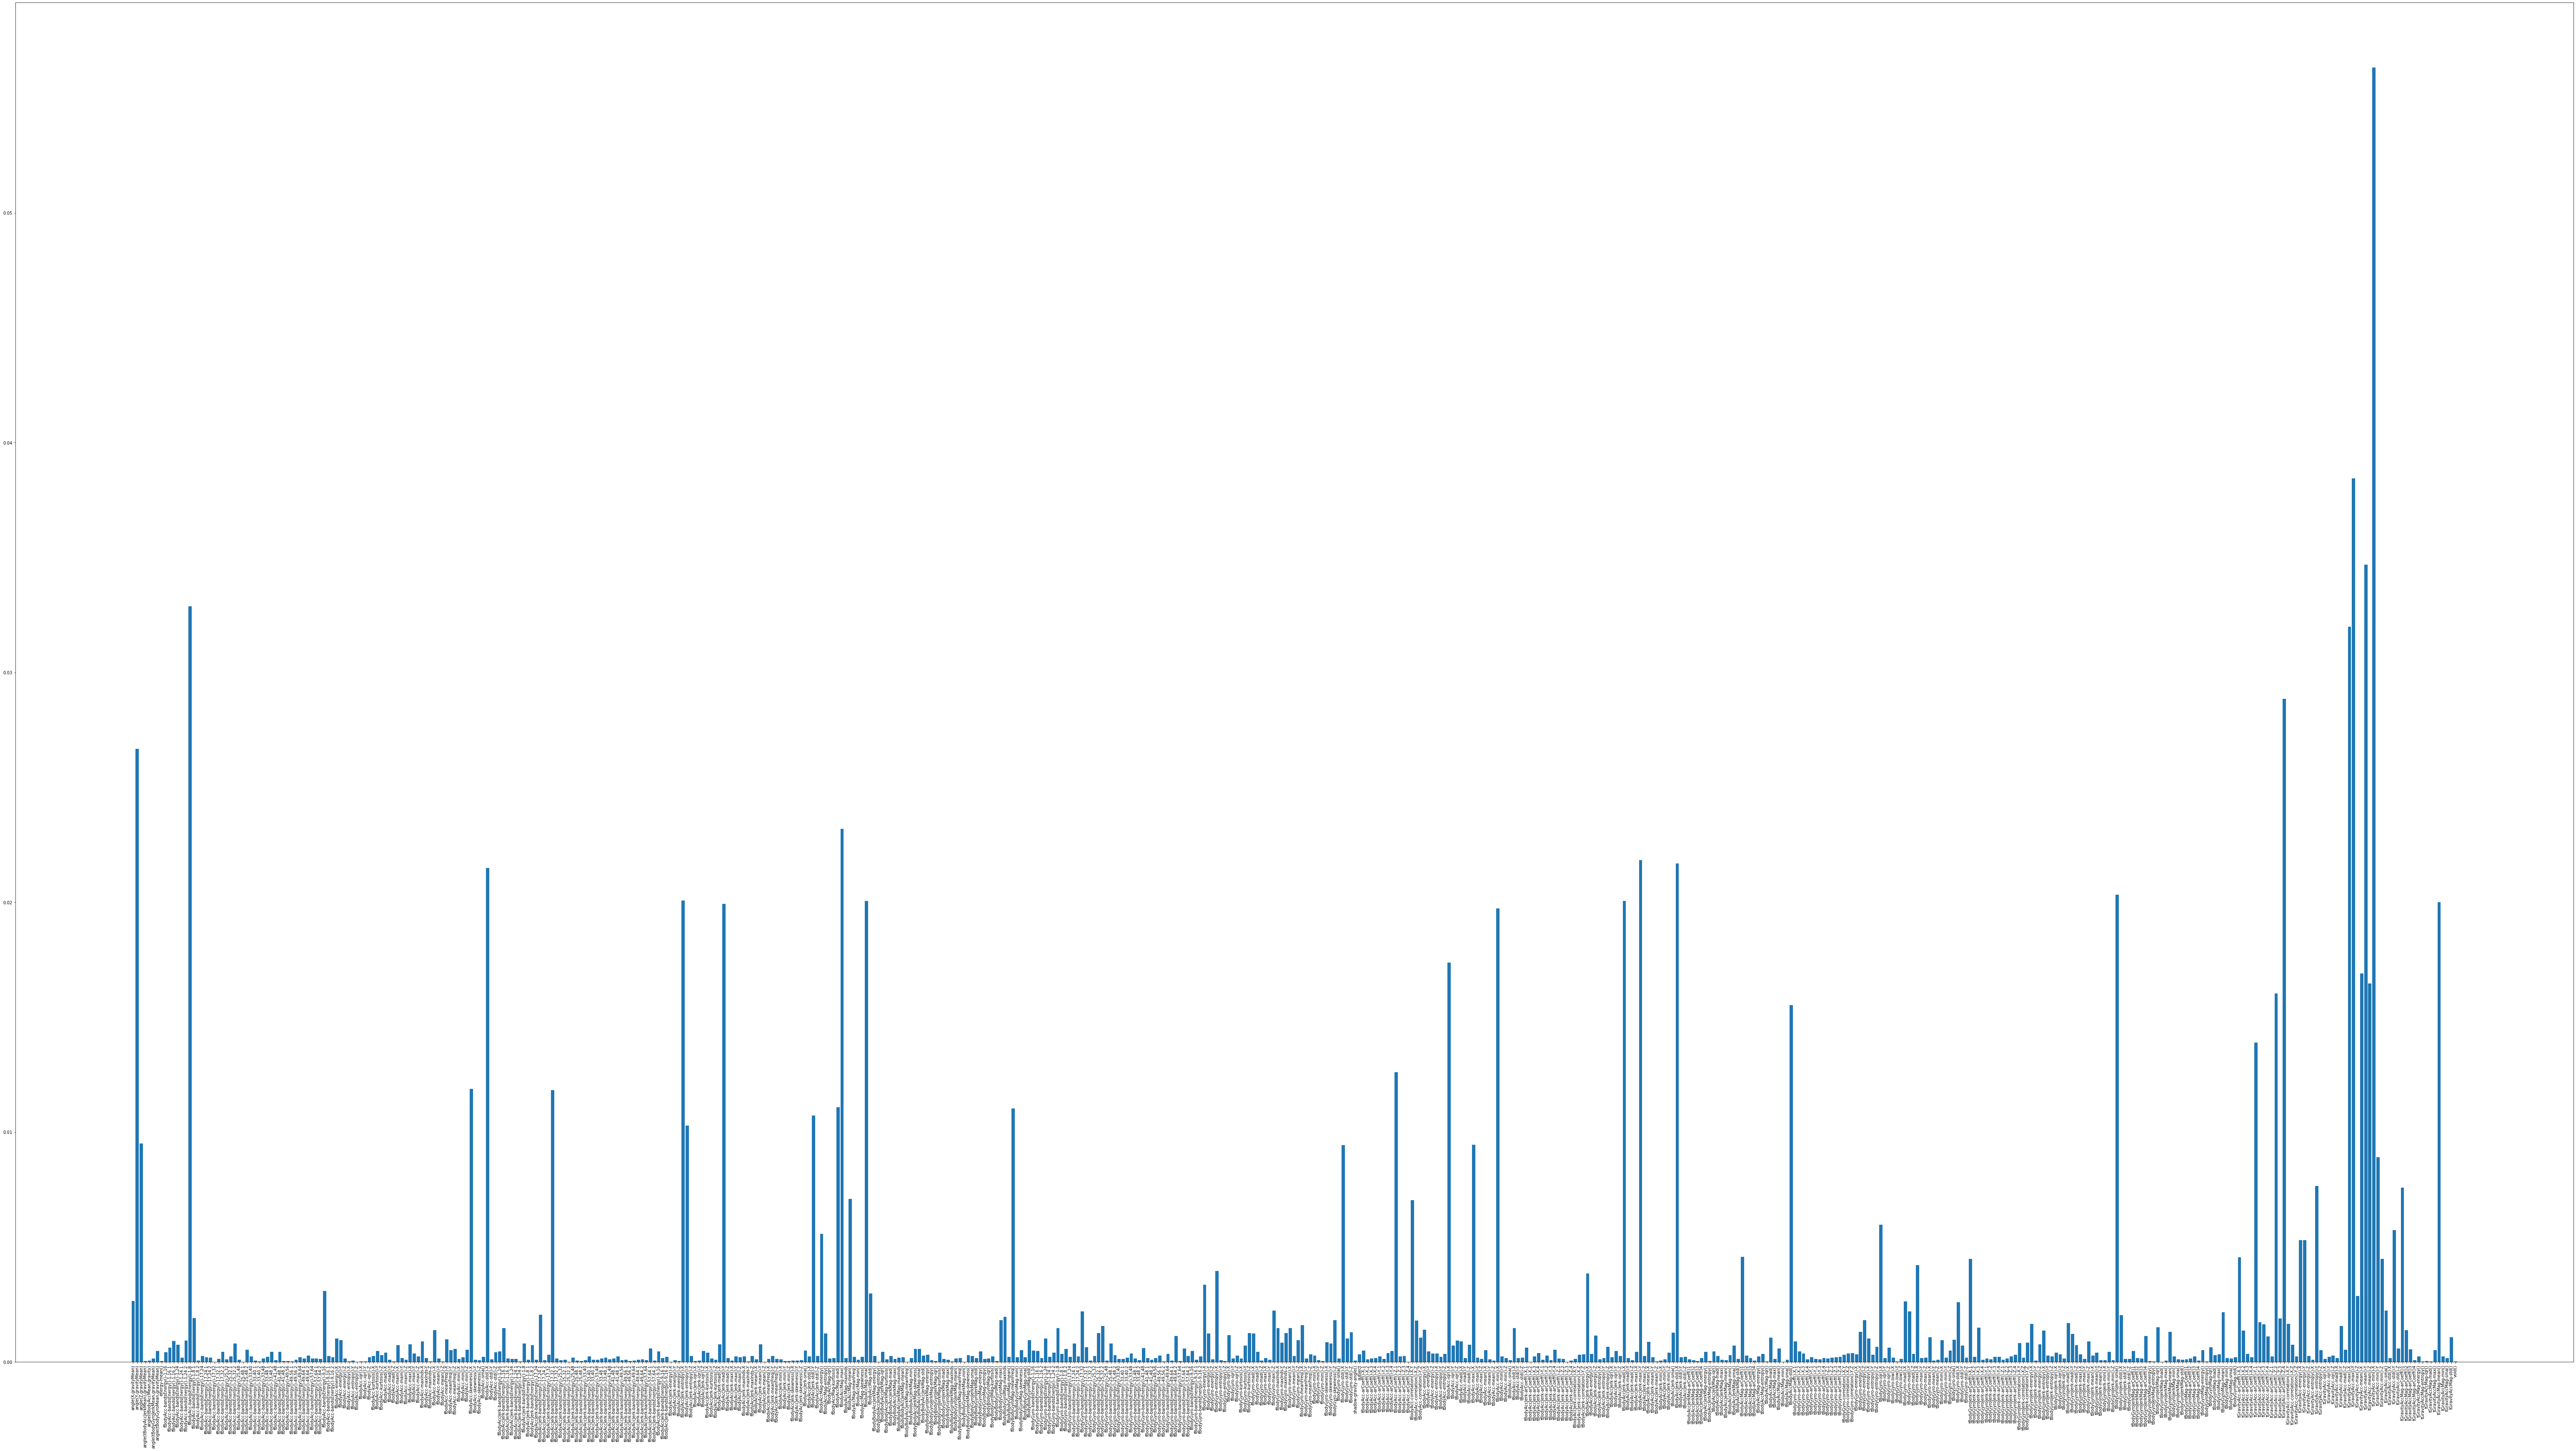

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model_sel = RandomForestClassifier(n_estimators=10)
model_sel.fit(data, y_data)

dictFeatures = (dict(zip(data.columns, model_sel.feature_importances_)))

plt.figure(figsize=(110,60))
plt.bar(range(len(dictFeatures)), list(dictFeatures.values()), align='center')
plt.xticks(range(len(dictFeatures)), list(dictFeatures.keys()), rotation = 90)

In [27]:
bestFeatureIndex = []
m = model_sel.feature_importances_
for i in m: 
    if(i>0.01): # Próg wyboru cech - zwiekszajac wybieramy jeszcze bardziej przydatne, ale bez przesady
        #print(i)
        #print(np.where(m==i))
        bestFeatureIndex.append((np.where(m==i)[0])[0])
        
X_train_sel = X_train.values[:, bestFeatureIndex]
X_test_sel = X_test.values[:, bestFeatureIndex]

# Redukcja przy progu 0.005 z 572 cech do 31
print('Redukcja cech z 572 do ' + str((X_test_sel.shape[1])))

Redukcja cech z 572 do 31


In [28]:
# LAS - cechy wybrane
rnd_forest_sel = RandomForestClassifier(n_estimators=10)
rnd_forest_sel.fit(X_train_sel, y_train)

preds = rnd_forest_sel.predict(X_test_sel)
print('LAS - cechy wybrane: ' + str(np.mean(preds == y_test)))

LAS - cechy wybrane: 0.9742424242424242


In [29]:
# LAS - bez wyboru cech (dla porównania)
rnd_forest_no_sel = RandomForestClassifier(n_estimators=10)
rnd_forest_no_sel.fit(X_train, y_train)

preds = rnd_forest_no_sel.predict(X_test)
np.mean(preds == y_test)

0.9772727272727273

In [35]:
# SVC - z wyborem
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', gamma='auto')
#Train the model using the training sets
clf.fit(X_train_sel, y_train)

#Predict the response for test dataset
preds = clf.predict(X_test_sel)
np.mean(preds == y_test)

0.9393939393939394

In [36]:
# SVC - bez wyboru (dla porównania)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', gamma='auto')
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
preds = clf.predict(X_test)
np.mean(preds == y_test)

0.9353535353535354

In [43]:
# Znacząca zmiana liczby cech (z 571 do 31 nie pogorszyła znacząco klasyfikacji)

# Szukanie najlepszego progu (ustalono zakres 0-0.0005 na podstawie wygenerowanego wyzej wykresu)
threshs = np.linspace(0, 0.001, 50)
# Listy na accuracy dla poszczególnych modeli
acc_forest = []
acc_svc = []
# Lista na liczbę cech
feat_no = []
best_feat_list = []

# Przeszukujemy w pętli progi i testujemy klasyfiaktory (trenujemy na wybranym zestawie (liczbie) cech zależnym od progu)
for thresh in threshs:
    bestFeatureIndex = []
    m = model_sel.feature_importances_
    for i in m: 
        if(i>thresh): # Próg wyboru cech - zwiekszajac wybieramy jeszcze bardziej przydatne, ale bez przesady - jak damy np. 0.04 to moze pozostac tylko kilka cech, albo i żadna...
            #print(i)
            #print(np.where(m==i))
            bestFeatureIndex.append((np.where(m==i)[0])[0])

    # Dodaj najlepsze cechy do listy
    best_feat_list.append(bestFeatureIndex)
            
    X_train_sel = X_train.values[:, bestFeatureIndex]
    X_test_sel = X_test.values[:, bestFeatureIndex]

    # Redukcja przy progu zadanym
    feat_no.append(X_test_sel.shape[1])
    
    # LAS - cechy wybrane
    rnd_forest_sel = RandomForestClassifier(n_estimators=10)
    rnd_forest_sel.fit(X_train_sel, y_train)

    preds = rnd_forest_sel.predict(X_test_sel)
    acc_forest.append(np.mean(preds == y_test))

    # SVC - z wyborem
    clf = SVC(kernel = 'rbf', gamma='auto')
    #Train the model using the training sets
    clf.fit(X_train_sel, y_train)

    # Predykcja SVC
    preds = clf.predict(X_test_sel)
    acc_svc.append(np.mean(preds == y_test))
    

In [44]:
for results in zip(threshs, feat_no, acc_forest, acc_svc):
    print(results)

(0.0, 558, 0.9767676767676767, 0.9373737373737374)
(2.0408163265306123e-05, 545, 0.9742424242424242, 0.9368686868686869)
(4.0816326530612245e-05, 526, 0.9782828282828283, 0.9373737373737374)
(6.122448979591836e-05, 497, 0.9787878787878788, 0.9378787878787879)
(8.163265306122449e-05, 473, 0.9792929292929293, 0.9388888888888889)
(0.00010204081632653062, 445, 0.9803030303030303, 0.9383838383838384)
(0.00012244897959183673, 425, 0.9777777777777777, 0.9388888888888889)
(0.00014285714285714287, 391, 0.9833333333333333, 0.9378787878787879)
(0.00016326530612244898, 364, 0.9762626262626263, 0.9393939393939394)
(0.0001836734693877551, 338, 0.9833333333333333, 0.9383838383838384)
(0.00020408163265306123, 320, 0.9833333333333333, 0.9383838383838384)
(0.00022448979591836734, 306, 0.9823232323232324, 0.9383838383838384)
(0.00024489795918367346, 278, 0.9777777777777777, 0.9409090909090909)
(0.0002653061224489796, 258, 0.9853535353535353, 0.9404040404040404)
(0.00028571428571428574, 248, 0.97979797979

In [ ]:
# Dla SVC
# Po sprawdzeniu progów z wykorzystaniem pętli wyznaczono najwyższą skuteczność modelu.
# Dla najlepszego progu wybrano 248 z 571 cech i osiągnięto najwyższą wartość accuracy - 94,24%
# Redukcja cech z 571 do 248
# Próg:0.00028571428571428574
# SVC - Z wyborem: 0.9424242424242424

# Dla lasu losowego:
# Wybór 258 cech z 571 - accuracy 98,53%
# Próg: 0.0002653061224489796
# Las - z wyborem: 0.9853535353535353

In [62]:
# Najlepsze cechy (INDEKSY!):
# Las
FOREST_best_feat_index = best_feat_list[acc_forest.index(max(acc_forest))]
# SVC
SVC_best_feat_index = best_feat_list[acc_svc.index(max(acc_svc))]

In [61]:
## TU MAMY GOTOWE INDEKSY CECH
# Można wybrać tak - tu dla lasu:
# X_train_sel = X_train.values[:, FOREST_best_feat_index]
# X_test_sel = X_test.values[:, FOREST_best_feat_index]

# Build and fit model

In [16]:
from sklearn.metrics import confusion_matrix 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)

# Evaluate on test data

In [17]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
print("Accuracy: {}".format(100 * np.mean(preds == y_test)))
print("Confiusion matrix:")
print(cm)

Accuracy: 97.87878787878788
Confiusion matrix:
[[444   0   0   0   0   0]
 [  2 368  18   0   0   0]
 [  0  20 319   0   0   0]
 [  0   0   0 311   0   0]
 [  0   0   0   0 192   1]
 [  0   0   0   0   1 304]]


# Save model and settings

In [18]:
import pickle

out = {"model" : model,
       "scaler" : min_max_scaler,
       "decoder" : decoder
       }

pickle.dump(out, open("model.pkl", "wb" ))